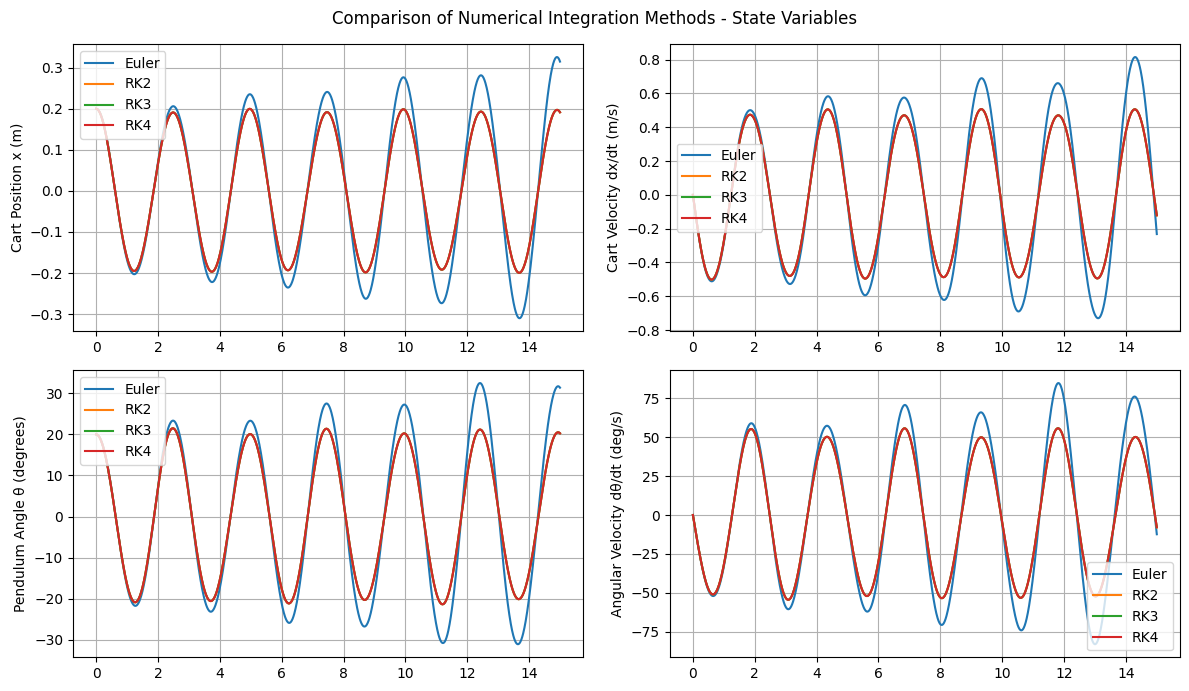

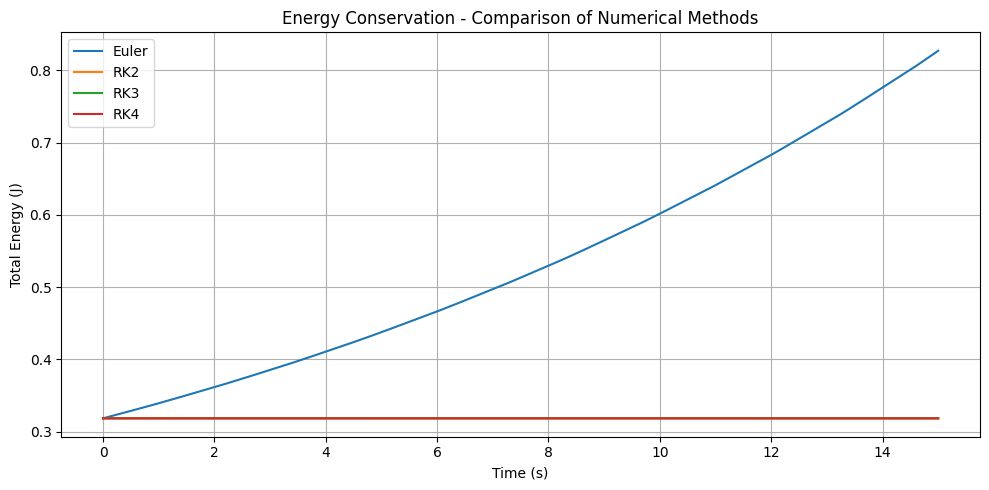

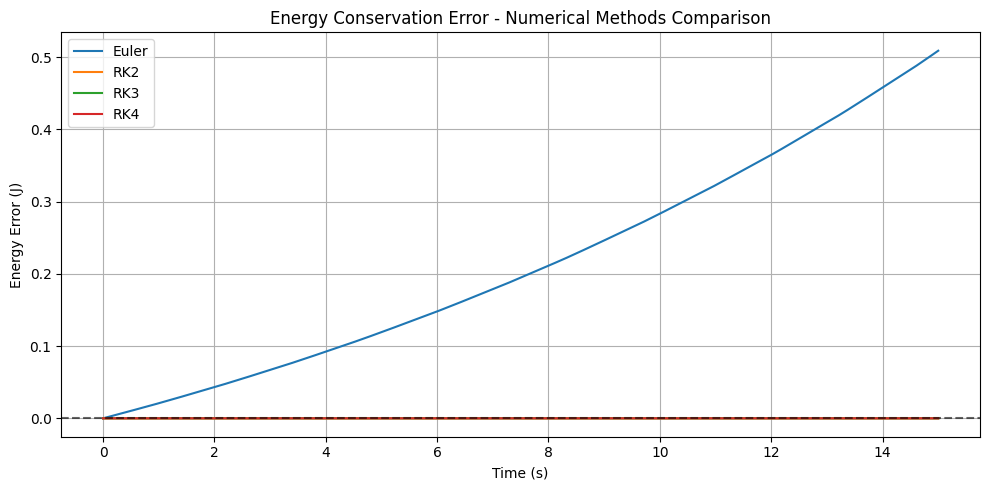

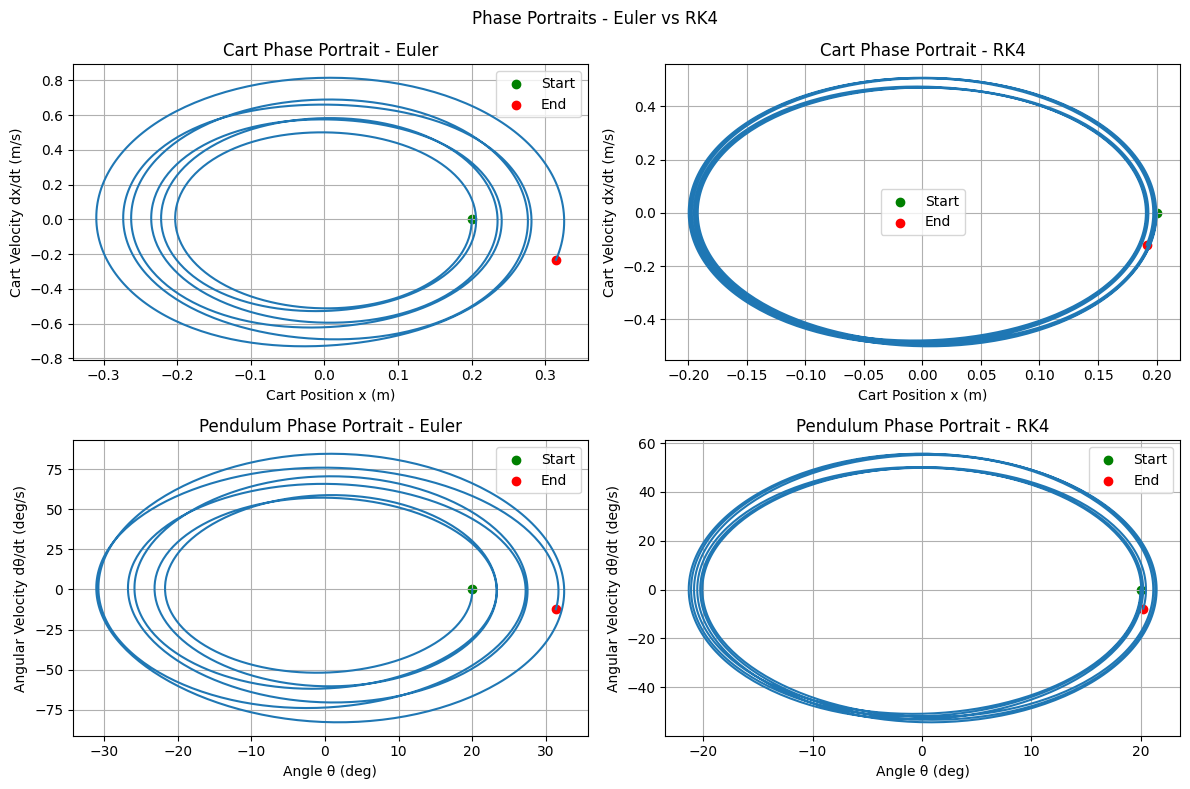

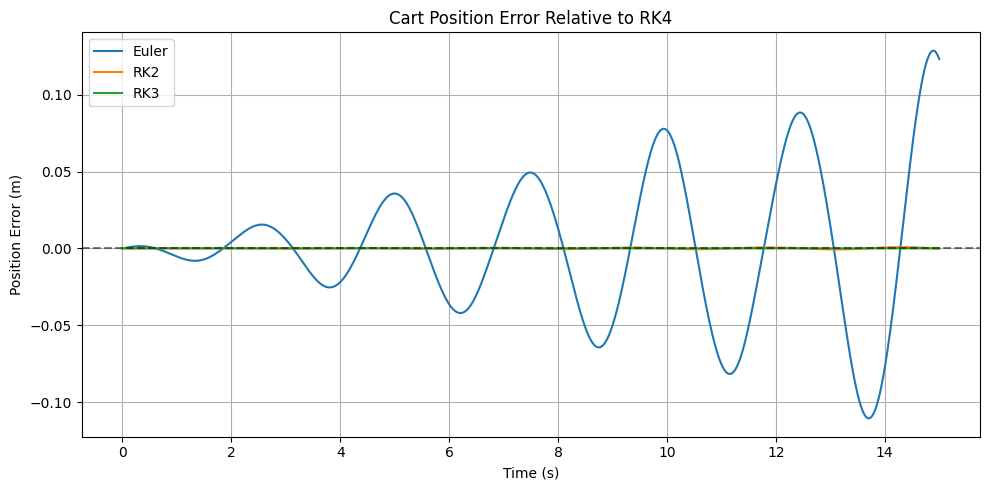

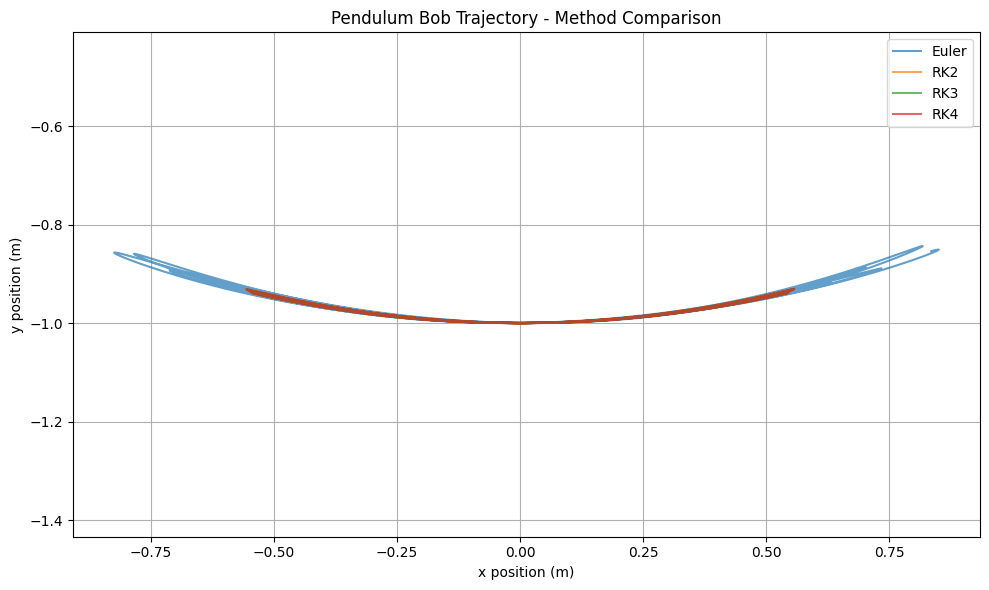

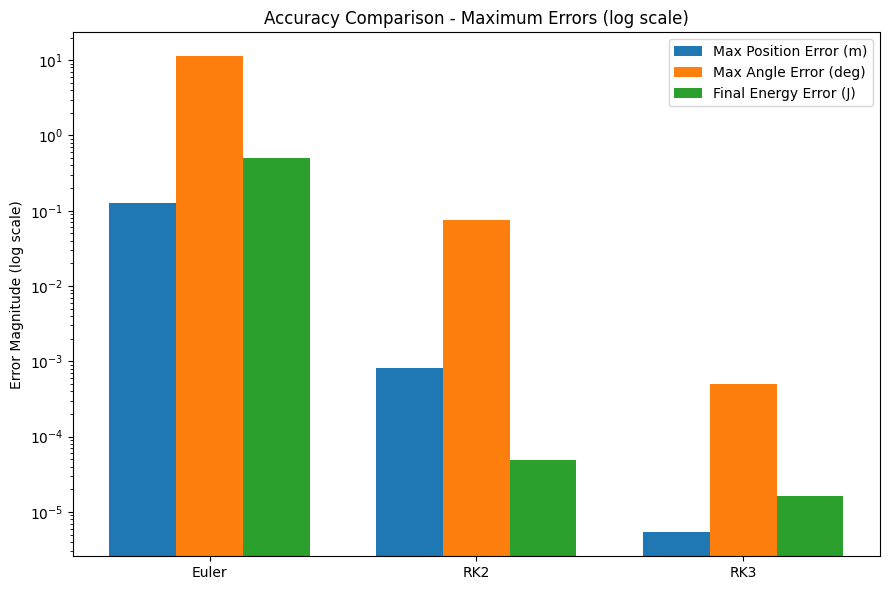


Summary Table (Compare to RK4)

  Method  Max Position Error (m)  Max Angle Error (deg)  \
0  Euler                0.128632              11.316232   
1    RK2                0.000807               0.074734   
2    RK3                0.000005               0.000505   

   Final Energy Error (J)  
0                0.509074  
1                0.000049  
2                0.000016  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# --- System Parameters ---
M = 1.0       # mass of cart (kg)
m = 0.2       # mass of pendulum bob (kg)
l = 1.0       # pendulum length (m)
k = 10.0      # spring constant (N/m)
b = 0.1       # cart damping (N·s/m)
g = 9.81      # gravity (m/s^2)


# --- ODE Definition ---
def F_ext(t, y):
    return 0.0



def rhs(t, y):
    x, x_dot, theta, theta_dot = y
    sin_t = np.sin(theta)
    cos_t = np.cos(theta)
    sin2 = sin_t * sin_t
    denom = M + m * sin2
    if denom == 0.0:
        denom = 1e-8
    num = (m * g * sin_t * cos_t +
           m * l * theta_dot**2 * sin_t -
           k * x +
           F_ext(t, y))
    x_ddot = num / denom
    theta_ddot = -(x_ddot * cos_t + g * sin_t) / l
    return np.array([x_dot, x_ddot, theta_dot, theta_ddot])

# --- Initial Conditions & Timeline ---
x0 = 0.2
x_dot0 = 0.0
theta0 = 20.0 * np.pi/180.0
theta_dot0 = 0.0
y0 = np.array([x0, x_dot0, theta0, theta_dot0])
t_start = 0.0
t_end = 15.0
dt = 0.01
n_steps = int((t_end - t_start) / dt) + 1
t_points = np.linspace(t_start, t_end, n_steps)

# --- Integration Methods ---
y_euler = np.zeros((n_steps, 4))
y_rk2 = np.zeros((n_steps, 4))
y_rk3 = np.zeros((n_steps, 4))
y_rk4 = np.zeros((n_steps, 4))

y_euler[0] = y0
y_rk2[0] = y0
y_rk3[0] = y0
y_rk4[0] = y0

for i in range(n_steps - 1):
    t = t_points[i]
    # Euler
    y_euler[i+1] = y_euler[i] + dt * rhs(t, y_euler[i])
    # RK2
    k1 = rhs(t, y_rk2[i])
    k2 = rhs(t + dt/2, y_rk2[i] + dt/2 * k1)
    y_rk2[i+1] = y_rk2[i] + dt * k2
    # RK3
    k1 = rhs(t, y_rk3[i])
    k2 = rhs(t + dt/2, y_rk3[i] + dt/2 * k1)
    k3 = rhs(t + dt, y_rk3[i] - dt * k1 + 2 * dt * k2)
    y_rk3[i+1] = y_rk3[i] + dt/6 * (k1 + 4*k2 + k3)
    # RK4
    k1 = rhs(t, y_rk4[i])
    k2 = rhs(t + dt/2, y_rk4[i] + dt/2 * k1)
    k3 = rhs(t + dt/2, y_rk4[i] + dt/2 * k2)
    k4 = rhs(t + dt, y_rk4[i] + dt * k3)
    y_rk4[i+1] = y_rk4[i] + dt/6 * (k1 + 2*k2 + 2*k3 + k4)

# --- Extract Variables ---
def unpack_methods(Y):
    x, x_dot, theta, theta_dot = Y[:, 0], Y[:, 1], Y[:, 2], Y[:, 3]
    return x, x_dot, theta, theta_dot
x_euler, x_dot_euler, theta_euler, theta_dot_euler = unpack_methods(y_euler)
x_rk2,   x_dot_rk2,   theta_rk2,   theta_dot_rk2   = unpack_methods(y_rk2)
x_rk3,   x_dot_rk3,   theta_rk3,   theta_dot_rk3   = unpack_methods(y_rk3)
x_rk4,   x_dot_rk4,   theta_rk4,   theta_dot_rk4   = unpack_methods(y_rk4)

# --- Energy ---
def energy(y):
    x, x_dot, theta, theta_dot = y
    vx = x_dot + l * theta_dot * np.cos(theta)
    vy = l * theta_dot * np.sin(theta)
    KE_cart = 0.5 * M * x_dot**2
    KE_pend = 0.5 * m * (vx**2 + vy**2)
    PE_pend = m * g * (l * (1 - np.cos(theta)))
    PE_spring = 0.5 * k * x**2
    return KE_cart + KE_pend + PE_pend + PE_spring

E_euler = np.array([energy(y_euler[i]) for i in range(n_steps)])
E_rk2   = np.array([energy(y_rk2[i])   for i in range(n_steps)])
E_rk3   = np.array([energy(y_rk3[i])   for i in range(n_steps)])
E_rk4   = np.array([energy(y_rk4[i])   for i in range(n_steps)])

# --- Plotting: State Variables Over Time ---
fig, axs = plt.subplots(2,2,figsize=(12,7))
axs[0,0].plot(t_points, x_euler, label='Euler')
axs[0,0].plot(t_points, x_rk2, label='RK2')
axs[0,0].plot(t_points, x_rk3, label='RK3')
axs[0,0].plot(t_points, x_rk4, label='RK4')
axs[0,0].set_ylabel('Cart Position x (m)')
axs[0,0].legend()
axs[0,0].grid()

axs[0,1].plot(t_points, x_dot_euler, label='Euler')
axs[0,1].plot(t_points, x_dot_rk2, label='RK2')
axs[0,1].plot(t_points, x_dot_rk3, label='RK3')
axs[0,1].plot(t_points, x_dot_rk4, label='RK4')
axs[0,1].set_ylabel('Cart Velocity dx/dt (m/s)')
axs[0,1].legend()
axs[0,1].grid()

axs[1,0].plot(t_points, theta_euler * 180/np.pi, label='Euler')
axs[1,0].plot(t_points, theta_rk2 * 180/np.pi, label='RK2')
axs[1,0].plot(t_points, theta_rk3 * 180/np.pi, label='RK3')
axs[1,0].plot(t_points, theta_rk4 * 180/np.pi, label='RK4')
axs[1,0].set_ylabel('Pendulum Angle θ (degrees)')
axs[1,0].legend()
axs[1,0].grid()

axs[1,1].plot(t_points, theta_dot_euler * 180/np.pi, label='Euler')
axs[1,1].plot(t_points, theta_dot_rk2 * 180/np.pi, label='RK2')
axs[1,1].plot(t_points, theta_dot_rk3 * 180/np.pi, label='RK3')
axs[1,1].plot(t_points, theta_dot_rk4 * 180/np.pi, label='RK4')
axs[1,1].set_ylabel('Angular Velocity dθ/dt (deg/s)')
axs[1,1].legend()
axs[1,1].grid()
plt.suptitle('Comparison of Numerical Integration Methods - State Variables')
plt.tight_layout()
plt.show()

# --- Energy Conservation ---
plt.figure(figsize=(10,5))
plt.plot(t_points, E_euler, label='Euler')
plt.plot(t_points, E_rk2, label='RK2')
plt.plot(t_points, E_rk3, label='RK3')
plt.plot(t_points, E_rk4, label='RK4')
plt.xlabel('Time (s)')
plt.ylabel('Total Energy (J)')
plt.legend()
plt.grid()
plt.title('Energy Conservation - Comparison of Numerical Methods')
plt.tight_layout()
plt.show()

# --- Energy Error Over Time ---
plt.figure(figsize=(10,5))
plt.plot(t_points, E_euler-E_euler[0], label='Euler')
plt.plot(t_points, E_rk2-E_rk2[0],   label='RK2')
plt.plot(t_points, E_rk3-E_rk3[0],   label='RK3')
plt.plot(t_points, E_rk4-E_rk4[0],   label='RK4')
plt.xlabel('Time (s)')
plt.ylabel('Energy Error (J)')
plt.legend()
plt.grid()
plt.title('Energy Conservation Error - Numerical Methods Comparison')
plt.axhline(0, color='k', ls='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Phase Portraits: Cart and Pendulum ---
fig, axs = plt.subplots(2,2,figsize=(12,8))
# Cart - Euler
axs[0,0].plot(x_euler, x_dot_euler)
axs[0,0].scatter(x_euler[0], x_dot_euler[0], color='green', label='Start')
axs[0,0].scatter(x_euler[-1], x_dot_euler[-1], color='red', label='End')
axs[0,0].set_xlabel('Cart Position x (m)')
axs[0,0].set_ylabel('Cart Velocity dx/dt (m/s)')
axs[0,0].set_title('Cart Phase Portrait - Euler')
axs[0,0].legend()
axs[0,0].grid()

# Cart - RK4
axs[0,1].plot(x_rk4, x_dot_rk4)
axs[0,1].scatter(x_rk4[0], x_dot_rk4[0], color='green', label='Start')
axs[0,1].scatter(x_rk4[-1], x_dot_rk4[-1], color='red', label='End')
axs[0,1].set_xlabel('Cart Position x (m)')
axs[0,1].set_ylabel('Cart Velocity dx/dt (m/s)')
axs[0,1].set_title('Cart Phase Portrait - RK4')
axs[0,1].legend()
axs[0,1].grid()

# Pendulum - Euler
axs[1,0].plot(theta_euler*180/np.pi, theta_dot_euler*180/np.pi)
axs[1,0].scatter(theta_euler[0]*180/np.pi, theta_dot_euler[0]*180/np.pi, color='green', label='Start')
axs[1,0].scatter(theta_euler[-1]*180/np.pi, theta_dot_euler[-1]*180/np.pi, color='red', label='End')
axs[1,0].set_xlabel('Angle θ (deg)')
axs[1,0].set_ylabel('Angular Velocity dθ/dt (deg/s)')
axs[1,0].set_title('Pendulum Phase Portrait - Euler')
axs[1,0].legend()
axs[1,0].grid()

# Pendulum - RK4
axs[1,1].plot(theta_rk4*180/np.pi, theta_dot_rk4*180/np.pi)
axs[1,1].scatter(theta_rk4[0]*180/np.pi, theta_dot_rk4[0]*180/np.pi, color='green', label='Start')
axs[1,1].scatter(theta_rk4[-1]*180/np.pi, theta_dot_rk4[-1]*180/np.pi, color='red', label='End')
axs[1,1].set_xlabel('Angle θ (deg)')
axs[1,1].set_ylabel('Angular Velocity dθ/dt (deg/s)')
axs[1,1].set_title('Pendulum Phase Portrait - RK4')
axs[1,1].legend()
axs[1,1].grid()
plt.suptitle('Phase Portraits - Euler vs RK4')
plt.tight_layout()
plt.show()

# --- Position Error Relative to RK4 ---
plt.figure(figsize=(10,5))
plt.plot(t_points, x_euler - x_rk4, label='Euler')
plt.plot(t_points, x_rk2 - x_rk4, label='RK2')
plt.plot(t_points, x_rk3 - x_rk4, label='RK3')
plt.axhline(0, color='k', ls='--', alpha=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Position Error (m)')
plt.legend()
plt.grid()
plt.title('Cart Position Error Relative to RK4')
plt.tight_layout()
plt.show()

# --- Pendulum Bob Trajectories ---
bob_x_euler = x_euler + l * np.sin(theta_euler)
bob_y_euler = -l * np.cos(theta_euler)
bob_x_rk2   = x_rk2   + l * np.sin(theta_rk2)
bob_y_rk2   = -l * np.cos(theta_rk2)
bob_x_rk3   = x_rk3   + l * np.sin(theta_rk3)
bob_y_rk3   = -l * np.cos(theta_rk3)
bob_x_rk4   = x_rk4   + l * np.sin(theta_rk4)
bob_y_rk4   = -l * np.cos(theta_rk4)

plt.figure(figsize=(10,6))
plt.plot(bob_x_euler, bob_y_euler, label='Euler', alpha=0.7)
plt.plot(bob_x_rk2,   bob_y_rk2,   label='RK2', alpha=0.7)
plt.plot(bob_x_rk3,   bob_y_rk3,   label='RK3', alpha=0.7)
plt.plot(bob_x_rk4,   bob_y_rk4,   label='RK4', alpha=0.7)
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('Pendulum Bob Trajectory - Method Comparison')
plt.legend()
plt.axis('equal')
plt.grid()
plt.tight_layout()
plt.show()

# --- Accuracy Metrics Bar Chart (log scale) ---
max_pos_errors = [np.max(np.abs(x_euler - x_rk4)),
                  np.max(np.abs(x_rk2   - x_rk4)),
                  np.max(np.abs(x_rk3   - x_rk4))]
max_angle_errors = [np.max(np.abs(theta_euler - theta_rk4))*180/np.pi,
                    np.max(np.abs(theta_rk2   - theta_rk4))*180/np.pi,
                    np.max(np.abs(theta_rk3   - theta_rk4))*180/np.pi]
final_energy_errors = [abs(E_euler[-1] - E_euler[0]),
                       abs(E_rk2[-1]   - E_rk2[0]),
                       abs(E_rk3[-1]   - E_rk3[0])]
methods = ["Euler", "RK2", "RK3"]
width = 0.25
x_pos = np.arange(len(methods))

plt.figure(figsize=(9,6))
plt.bar(x_pos, max_pos_errors, width, label='Max Position Error (m)')
plt.bar(x_pos+width, max_angle_errors, width, label='Max Angle Error (deg)')
plt.bar(x_pos+2*width, final_energy_errors, width, label='Final Energy Error (J)')
plt.xticks(x_pos+width, methods)
plt.yscale('log')
plt.ylabel('Error Magnitude (log scale)')
plt.title('Accuracy Comparison - Maximum Errors (log scale)')
plt.legend()
plt.tight_layout()
plt.show()

# --- Print Summary Table ---
print("\nSummary Table (Compare to RK4)\n")
df = pd.DataFrame({
    "Method": methods,
    "Max Position Error (m)": max_pos_errors,
    "Max Angle Error (deg)": max_angle_errors,
    "Final Energy Error (J)": final_energy_errors
})
print(df)
